In [1]:
import numpy as np

In [2]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

In [3]:
# return dot product
def net_input(X, w):
    print(f"Calculation dot product of {X} and {w}")
    result = np.dot(X, w)
    print(f"which is {result}")
    return result

In [4]:
def logistic(z):
    print(f"Calculating logistic regression of {z}")
    return 1.0 / (1.0 + np.exp(-z))

In [5]:
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

In [6]:
print(f"Calculate logistic activation of {X} and {w}")
logistic_activation(X, w)

Calculate logistic activation of [1.  1.4 2.5] and [0.4 0.3 0.5]
Calculation dot product of [1.  1.4 2.5] and [0.4 0.3 0.5]
which is 2.0700000000000003
Calculating logistic regression of 2.0700000000000003


0.8879529614430097

### testing output layer with multiple logistic activation units

In [7]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
            [0.2, 0.4, 1.0, 0.2],
            [0.6, 1.5, 1.2, 0.7]])
W

array([[1.1, 1.2, 0.8, 0.4],
       [0.2, 0.4, 1. , 0.2],
       [0.6, 1.5, 1.2, 0.7]])

In [8]:
A = np.array([[1, 0.1, 0.4, 0.6]])
A

array([[1. , 0.1, 0.4, 0.6]])

In [9]:
Z = np.dot(W, A[0])
Z

array([1.78, 0.76, 1.65])

In [10]:
y_probas = logistic(Z)
y_probas

Calculating logistic regression of [1.78 0.76 1.65]


array([0.85569687, 0.68135373, 0.83889105])

In [11]:
np.argmax(Z, axis = 0)

0

In [12]:
def softmax(z):
    print(f"Calculating softmax {z}")
    return np.exp(z) / np.sum(np.exp(z))

In [13]:
softmax(Z)

Calculating softmax [1.78 0.76 1.65]


array([0.44668973, 0.16107406, 0.39223621])

In [14]:
# use tensorflow instead
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
Z_tensor = tf.expand_dims(Z, axis = 0)
Z_tensor

Instructions for updating:
non-resource variables are not supported in the long term


<tf.Tensor 'ExpandDims:0' shape=(1, 3) dtype=float64>

In [15]:
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor 'Softmax:0' shape=(1, 3) dtype=float64>

In [16]:
# hyperbolic tangent / tanh
# has a broader spectrum in the open interval

In [17]:
import matplotlib.pyplot as plt

In [18]:
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

In [19]:
z = np.arange(-5,5, 0.005)
z

array([-5.   , -4.995, -4.99 , ...,  4.985,  4.99 ,  4.995])

In [20]:
log_act = logistic(z)
log_act

Calculating logistic regression of [-5.    -4.995 -4.99  ...  4.985  4.99   4.995]


array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [21]:
tanh_act = tanh(z)
tanh_act

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

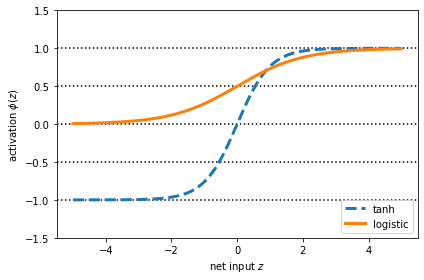

In [22]:
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,linewidth=3, linestyle='--',label='tanh')
plt.plot(z, log_act,
         linewidth=3,
         label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [23]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [24]:
tf.keras.activations.tanh(z)

<tf.Tensor 'Tanh:0' shape=(2000,) dtype=float64>

In [25]:
from scipy.special import expit
expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [26]:
tf.keras.activations.sigmoid(z)

<tf.Tensor 'Sigmoid:0' shape=(2000,) dtype=float64>

### Rectified linear unit activation

In [27]:
tf.keras.activations.tanh(z)

<tf.Tensor 'Tanh_1:0' shape=(2000,) dtype=float64>